# Task 1 - Import the libraries and load the dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

# Task 2 - Display the first instance as an image

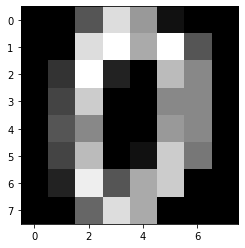

In [11]:
some_digit = X[0].reshape((8, 8))
plt.imshow(some_digit, cmap='gray')

# Task 3 - Print the label of the first instance

In [12]:
print(y[0])

0


# Task 4 - Split data into training and test subsets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Task 5 - Create a pipeline to train our model

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pipeline = Pipeline(
    [('scaler', StandardScaler()), 
     ('pca', PCA(n_components = 0.95)), 
     ('svm', SVC(random_state = 0))])

# Task 6 - Perform a grid search to find the best hyperparameters

In [15]:
from sklearn.model_selection import GridSearchCV

params = {'svm__C':[1, 5, 8, 10], 'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(pipeline, params, cv = 4, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9860820953265242
{'svm__C': 8, 'svm__kernel': 'poly'}


# Task 7 - Get the ratio of variance explained by each component

In [16]:
best_model = grid_search.best_estimator_

print(best_model.named_steps['pca'].explained_variance_ratio_)

[0.12164624 0.09634853 0.08578334 0.06457027 0.04897962 0.04183235
 0.03929765 0.03282099 0.02979124 0.02809632 0.02741238 0.02602094
 0.02304403 0.02207157 0.02049244 0.01784251 0.01735509 0.01662399
 0.01624181 0.01510787 0.01347544 0.01294908 0.0117134  0.01062522
 0.01039421 0.00941729 0.00932626 0.00840604 0.00827709 0.00789892
 0.00749741 0.00715596 0.00665508 0.00641068 0.00594299 0.00567498
 0.00514703 0.00473037 0.00454567 0.00420127]


In [17]:
print(best_model.named_steps['pca'].n_components_)

40


# Task 8 - Evaluate the best estimator on the test set

In [18]:
from sklearn.metrics import accuracy_score
y_test_pred = best_model.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9833333333333333
